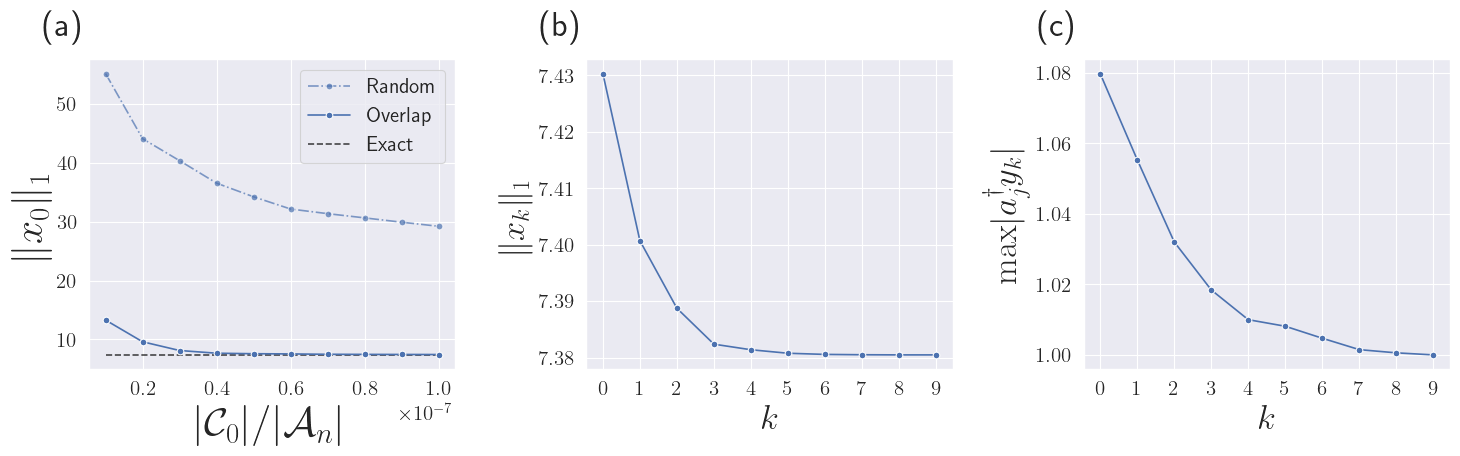

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set_theme("paper")
color_table = plt.rcParams["axes.prop_cycle"].by_key()["color"]
rc = {
    "mathtext.fontset": "stix",
    "font.size": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage{amsmath}",
}
plt.rcParams.update(rc)


def visualize_performance(n, kind, ax):
    log_file_name = f"../data/random_vs_overlap/{kind}_{n}_data.txt"

    with open(log_file_name, mode="r") as f:
        lines = f.readlines()
        lines.pop(0)
        colors = [color_table[0], color_table[0], "black"]
        markers = ["o", "o", None]
        alphas = [0.7, 1, 0.7]
        methods = ["Random", "Overlap", "Exact"]
        line_styles = ["-.", "-", "--"]
        for i in range(3):
            Ks = []
            extents = []
            for _ in range(10):
                _K, _method, _extent = map(str.strip, lines.pop(0).split(",")[2:])
                K = float(_K[_K.find("=") + 1 :])
                extent = float(_extent[_extent.find("=") + 1 :])
                assert methods[i] == _method[_method.find("=") + 2 : -1]
                Ks.append(K)
                extents.append(extent)
            sns.lineplot(
                data=pd.DataFrame({"K": Ks, "extent": extents}),
                x="K",
                y="extent",
                color=colors[i],
                label=methods[i],
                alpha=alphas[i],
                marker=markers[i],
                linestyle=line_styles[i],
                zorder=1 if methods[i] == "Exact" else 2,
            )

    ax.set_xlabel(
        r"$\lvert \mathcal{C}_0 \rvert / \lvert \mathcal{A}_n \rvert$", fontsize=30
    )
    ax.set_ylabel(r"$\lVert x_0 \rVert_1$", fontsize=30)


def visualize_CG(n, kind, ax1, ax2):
    log_file_name = f"../data/CG/{kind}_{n}_data.txt"

    extends = []
    max_values = []
    with open(log_file_name, mode="r") as f:
        lines = f.readlines()
        for line in lines:
            extend, max_value = map(float, line.split())
            extends.append(extend)
            max_values.append(max_value)

    sns.lineplot(x=list(range(len(extends))), y=extends, ax=ax1, marker="o")
    ax1.set_xlabel("$k$", fontsize=25)
    ax1.set_ylabel("$\\lVert x_k \\rVert_1$", fontsize=25)
    ax1.set_xticks(list(range(len(extends))))
    sns.lineplot(x=list(range(len(max_values))), y=max_values, ax=ax2, marker="o")
    ax2.set_xlabel("$k$", fontsize=25)
    ax2.set_ylabel("$\max \\lvert a_j^\dagger y_k \\rvert$", fontsize=25)
    ax2.set_xticks(list(range(len(max_values))))


if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 3, 1)
    visualize_performance(7, "pure", ax1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    visualize_CG(7, "pure", ax2, ax3)

    ax1.set_title("(a)", fontsize=25, x=-0.07, y=1.05)
    ax2.set_title("(b)", fontsize=25, x=-0.07, y=1.05)
    ax3.set_title("(c)", fontsize=25, x=-0.07, y=1.05)

    plt.tight_layout()
    plt.savefig("../image/CG_7.pdf", bbox_inches="tight", pad_inches=0.1)